# World population distribution

This dataset contains the `population` for each world `region` from 1800 through 2100 (projected).

The four regions are defined by Gapminder.org. The regions are Africa, Asia, Europe, and the Americas.

This csv also contains global data (`region` is 'world') and other indicators including `life_expectancy`, `child_mortality` rates (per 1000), average number of `babies_per_woman`, and average `income_per_person` (in adjusted USD). See the README for details.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

indicators = pd.read_csv('world-indicators.csv')
indicators

,year,region,population,life_expectancy,child_mortality,babies_per_woman,income_per_person
0,1800,africa,81209567,30.091575,443.51,6.58,437.699297
1,1801,africa,81313551,30.016479,443.47,6.58,437.322912
2,1802,africa,81418900,30.019117,443.44,6.58,436.949999
3,1803,africa,81525621,30.099188,443.41,6.58,436.501460
4,1804,africa,81633731,30.101720,443.37,6.58,436.033850
...,...,...,...,...,...,...,...
1500,2096,world,10225850874,83.170480,12.00,1.81,43370.546400
1501,2097,world,10215549310,83.280416,11.00,1.81,43731.659780
1502,2098,world,10204489862,83.393080,11.00,1.80,44094.151440
1503,2099,world,10192689066,83.506378,11.00,1.80,44457.765070


### Project Ideas

#### Horizontal Bar plot

- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

- In the `year` 2100, the UN projects 11 billion people. Again, predict how many blocks would now go to each `region`.

- Test your predictions. First create a new column named `pop_billions` (`population` divided by 1e9 that is rounded to the nearest would number).

- Then filter on the years 2000 and 2100 to create your horizontal bar plots. 

- Follow the Pro Tips for horizontal bar plots.

Challenge: Place your plots side by side by using `plt.subplots(1,2)`.

#### Line Plot

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

- We pivoted the dataframe for you in the variable `df_pivot`.

- Follow the Pro Tips for line plots.



In [2]:
# quick data cleaning
df = indicators[['year', 'region', 'population']]   # select columns of interest
df = df.query('region != "world"')  # only include 4 regions
df

,year,region,population
0,1800,africa,81209567
1,1801,africa,81313551
2,1802,africa,81418900
3,1803,africa,81525621
4,1804,africa,81633731
...,...,...,...
1199,2096,americas,1097157450
1200,2097,americas,1094294136
1201,2098,americas,1091411644
1202,2099,americas,1088499555


In [4]:
# Pivot the DataFrame for the line plot
df_pivot = df.pivot(index='year', columns='region', values='population').reset_index()
df_pivot.columns.name = None  # remove index name
df_pivot

,year,africa,americas,asia,europe
0,1800,81209567,23556679,672521875,206910570
1,1801,81313551,23817319,674654640,207842812
2,1802,81418900,24087376,676807276,208785186
3,1803,81525621,24367066,678979750,209737823
4,1804,81633731,24656605,681172043,210700861
...,...,...,...,...,...
296,2096,3751829414,1097157450,4686523734,681699726
297,2097,3767448939,1094294136,4665879849,679322405
298,2098,3782475092,1091411644,4645089450,676946774
299,2099,3796918938,1088499555,4624187438,674553325


In [3]:
def add_end_labels(df, x, column_names, alpha=1, fontweight='normal'):
    for column_name in column_names:
        y = df[column_name].iloc[-1]
        label = f'  {column_name}'
        plt.text(x, y, label, va="center", alpha=alpha, fontweight=fontweight)

In [6]:
### Project Ideas

#### Horizontal Bar plot

- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

- In the `year` 2100, the UN projects 11 billion people. Again, predict how many blocks would now go to each `region`.

- Test your predictions. First create a new column named `pop_billions` (`population` divided by 1e9 that is rounded to the nearest would number).

- Then filter on the years 2000 and 2100 to create your horizontal bar plots.

- Follow the Pro Tips for horizontal bar plots.

Challenge: Place your plots side by side by using `plt.subplots(1,2)`.


In [4]:
# Create 'pop_billions' column
df['pop_billions'] = round(df['population'] / 1e9)
df

,year,region,population,pop_billions
0,1800,africa,81209567,0.0
1,1801,africa,81313551,0.0
2,1802,africa,81418900,0.0
3,1803,africa,81525621,0.0
4,1804,africa,81633731,0.0
...,...,...,...,...
1199,2096,americas,1097157450,1.0
1200,2097,americas,1094294136,1.0
1201,2098,americas,1091411644,1.0
1202,2099,americas,1088499555,1.0


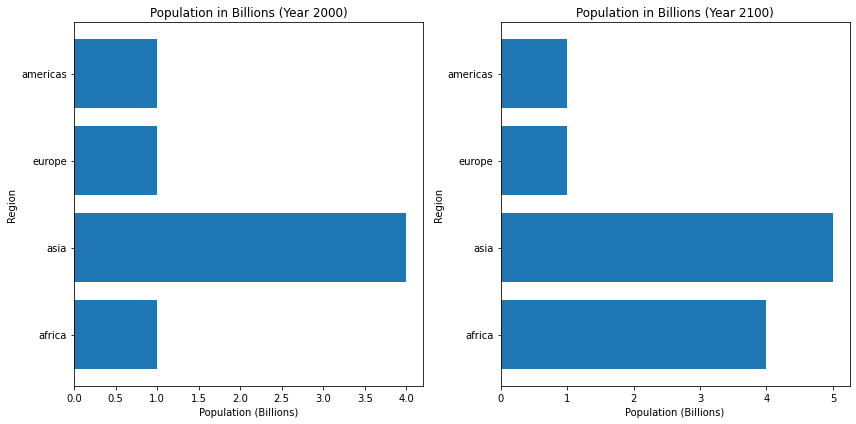

In [5]:
# Filter data for years 2000 and 2100
df_2000 = df[df['year'] == 2000]
df_2100 = df[df['year'] == 2100]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for year 2000
axes[0].barh(df_2000['region'], df_2000['pop_billions'])
axes[0].set_title('Population in Billions (Year 2000)')
axes[0].set_xlabel('Population (Billions)')
axes[0].set_ylabel('Region')

# Plot for year 2100
axes[1].barh(df_2100['region'], df_2100['pop_billions'])
axes[1].set_title('Population in Billions (Year 2100)')
axes[1].set_xlabel('Population (Billions)')
axes[1].set_ylabel('Region')

plt.tight_layout()
plt.show()